In [2]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

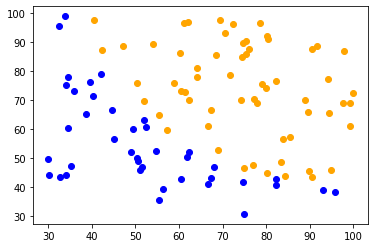

In [3]:
#Reading and visualization
file = pd.read_csv("data1.csv", header=None)
file = file.to_numpy()

def print_scatter(file):
    positive_mask = file[:, 2] == 1
    negative_mask = file[:, 2] == 0
    positives = file[positive_mask, :]
    negatives = file[negative_mask, :]
    plt.scatter(positives[:, 0], positives[:, 1], color='orange')
    plt.scatter(negatives[:, 0], negatives[:, 1], color="blue")
    
print_scatter(file)

In [4]:
dimensions = np.shape(file)[1] - 1
n = np.shape(file)[0]
X = file[:, 0:-1]
Y = file[:, [-1]]

# Some formatting and parameters initialization
t = np.transpose(np.random.rand(1, dimensions + 1))

# Adjust the dimensions of X
ones = np.ones((n, 1))
X = np.hstack((ones, X))

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [6]:
def costFunction(X, thetas, Y):
    return np.sum(np.matmul(X, thetas) - Y)

In [7]:
# The gradient descent function for logistic regression
# Remember, as you can see the pattern here, this function can be generalized to take a prediction function!
# Thank you SICP
def gradient_descent(X, Y, theta, learning_rate, num_iters):
    n = np.shape(X)[0]
    for i in range(num_iters):
#         Using schotastic GD
        for j in range(n):
            example = np.array([X[j]])
            prediction = np.apply_along_axis(sigmoid, 0, np.matmul(example, theta))
            error = Y[j] - prediction
            theta += learning_rate * (error) * (np.transpose(example))
    return theta

In [8]:
# The prediction function. It predicts Y from respective X and thetas
def predict(X, thetas):
    """X is a nxd dimensional array and theta is a dx1 dimensional"""
    ones = np.ones((np.shape(X)[0], 1))
# multiply the parameters and features, apply sigmoid function to each of them
    prediction = np.apply_along_axis(sigmoid, 0, np.matmul(np.hstack((ones, X)), thetas))
#     return 1 if >= 0 else 0
    return np.where(prediction >= 0, 1, 0)

In [13]:
thetas = gradient_descent(X, Y, t, 0.05, 3000)

<ipython-input-5-b683d5dd8fa4>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [10]:
print(thetas)

[[-1346.1189137 ]
 [    9.89801315]
 [   12.43531361]]


In [11]:
def plotDecisionBoundary(thetas, low, high):
    theta_dim = np.shape(thetas)[0]
    x_coeffs = thetas[:theta_dim-1]
    y_coeff = thetas[theta_dim-1][0]
    rows_xs = np.arange(low, high, 0.1)
    n = np.size(rows_xs)
    xs = np.linspace(rows_xs, rows_xs, 1)
    xs = np.transpose(xs)
    
    for i in range(2, theta_dim-1):
        xs = np.append(xs, xs[:, 0] ** i, axis=1)
    
    ones = np.ones((n, 1))
    xs = np.hstack((ones, xs))
    ys = (np.matmul(xs, x_coeffs))/(-y_coeff)
    
    plt.plot(xs[:, 1], ys, color='green')
    print_scatter(file)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Gradient Descent Prediction")
    plt.show()

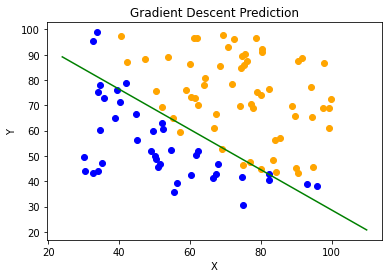

In [12]:
plotDecisionBoundary(thetas, 24, 110)